In [2]:
from eda_imports import *

In [3]:
pkl_files = sorted(glob.glob('../download/*/*.pkl'))

In [4]:
pkl_files

['../download/ensembl/Homo_sapiens.GRCh37.75.pkl',
 '../download/ensembl/Homo_sapiens.GRCh37.87.pkl',
 '../download/ensembl/Homo_sapiens.GRCh38.92.pkl',
 '../download/ensembl/Homo_sapiens.GRCh38.93.pkl',
 '../download/gencode/gencode.v28.annotation.pkl']

In [5]:
%%time
dfs = []
for f in pkl_files:
    _df = pd.read_pickle(f)
    _df['gtf_version'] = os.path.basename(f)

    # rename columns for consistent with the other versions
    if 'GRCh37.75' in f:
        _df.rename(columns={
            'source': 'transcript_biotype', 
        }, inplace=True)
        
    if 'gencode' in f:
        _df.rename(columns={
            'gene_type': 'gene_biotype', 
            'transcript_type': 'transcript_biotype', 
        }, inplace=True)
    dfs.append(_df)

CPU times: user 23.3 s, sys: 13.4 s, total: 36.7 s
Wall time: 36.7 s


In [6]:
res = []
for f, df in zip(pkl_files, dfs):
    print(f, df.shape)
    res.append((
        os.path.basename(f),
        df.query('gene_biotype == "protein_coding"').gene_id.unique().shape[0],
        df.query('transcript_biotype == "protein_coding"').transcript_id.unique().shape[0],
        df.gene_id.unique().shape[0],
        df.transcript_id.unique().shape[0],
    ))

../download/ensembl/Homo_sapiens.GRCh37.75.pkl (2828312, 26)
../download/ensembl/Homo_sapiens.GRCh37.87.pkl (2613765, 34)
../download/ensembl/Homo_sapiens.GRCh38.92.pkl (2689566, 33)
../download/ensembl/Homo_sapiens.GRCh38.93.pkl (2689566, 33)
../download/gencode/gencode.v28.annotation.pkl (2693966, 92)


In [7]:
cols = ['version', 'num_protein_coding_genes', 'num_protein_coding_transcripts', 'num_all_genes', 'num_all_transcripts']
df_res = pd.DataFrame(res, columns=cols)

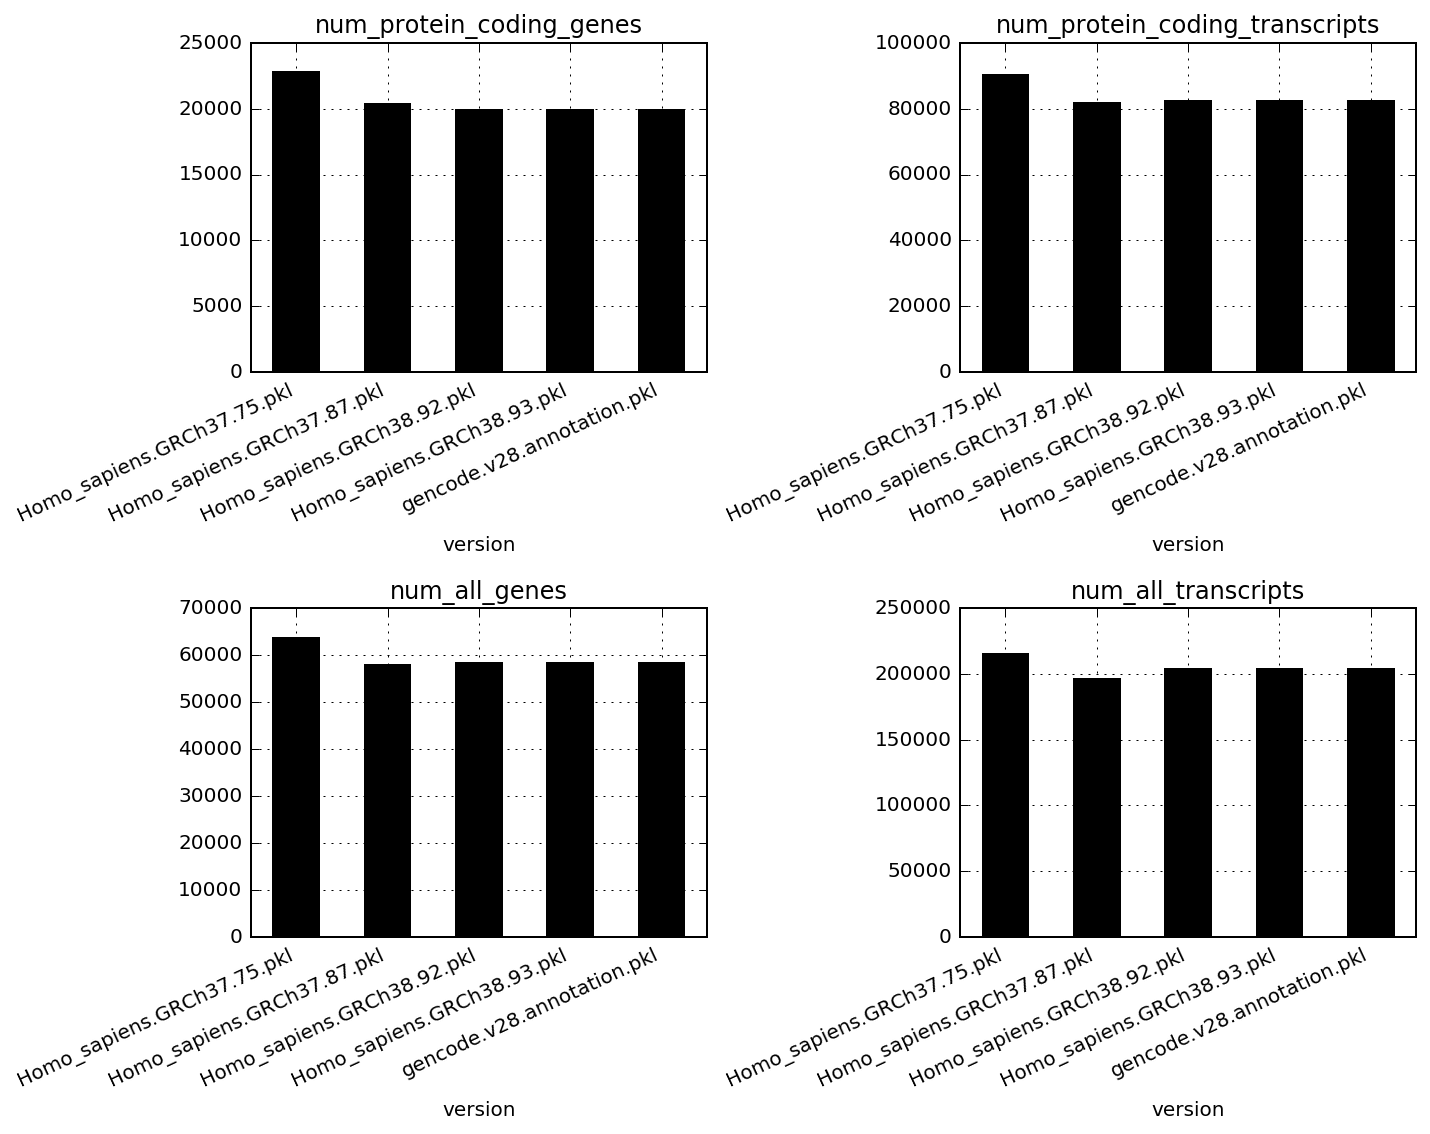

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for k, col in enumerate(cols[1:]):
    ax = axes[k]
    df_res.plot.bar(x='version', y=col, ax=ax, rot=25, color='black')
    ax.legend_.remove()
    ax.set_title(col)
    ax.grid()
    
    for t in ax.xaxis.get_major_ticks():
        t.label.set_horizontalalignment('right')
plt.tight_layout()
plt.savefig('../gtf-comparison.png')

# Comparing Homo_sapiens.GRCh38.92.pkl and Homo_sapiens.GRCh38.93.pkl

The two are very similar, but still different

In [11]:
dfs[2].head()

,seqname,source,feature,start,end,score,strand,frame,ccds_id,exon_id,exon_number,exon_version,gene_biotype,gene_id,gene_name,gene_source,gene_version,protein_id,protein_version,tag:CCDS,tag:basic,tag:cds_end_NF,tag:cds_start_NF,tag:mRNA_end_NF,tag:mRNA_start_NF,tag:seleno,transcript_biotype,transcript_id,transcript_name,transcript_source,transcript_support_level,transcript_version,gtf_version
0,1,havana,gene,11869,14409,.,+,.,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Homo_sapiens.GRCh38.92.pkl
1,1,havana,transcript,11869,14409,.,+,.,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2,Homo_sapiens.GRCh38.92.pkl
2,1,havana,exon,11869,12227,.,+,.,NaN,ENSE00002234944,1,1,transcribed_unprocessed_pseudogene,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2,Homo_sapiens.GRCh38.92.pkl
3,1,havana,exon,12613,12721,.,+,.,NaN,ENSE00003582793,2,1,transcribed_unprocessed_pseudogene,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2,Homo_sapiens.GRCh38.92.pkl
4,1,havana,exon,13221,14409,.,+,.,NaN,ENSE00002312635,3,1,transcribed_unprocessed_pseudogene,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2,Homo_sapiens.GRCh38.92.pkl


In [12]:
for col in dfs[2].columns:
    print(col, (dfs[2][col].fillna(0) == dfs[3][col].fillna(0)).all())

seqname True
source True
feature True
start True
end True
score True
strand True
frame True
ccds_id False
exon_id True
exon_number True
exon_version True
gene_biotype True
gene_id True
gene_name False
gene_source True
gene_version True
protein_id True
protein_version True
tag:CCDS False
tag:basic True
tag:cds_end_NF True
tag:cds_start_NF True
tag:mRNA_end_NF True
tag:mRNA_start_NF True
tag:seleno True
transcript_biotype True
transcript_id True
transcript_name False
transcript_source True
transcript_support_level True
transcript_version True
gtf_version False


In [13]:
set(dfs[2]['gene_name'].unique()) - set(dfs[3]['gene_name'].unique())

{'AC004706.4',
 'AC006070.1',
 'AC007326.6',
 'AC008560.1',
 'AC009779.7',
 'AC010442.3',
 'AC011476.5',
 'AC012314.10',
 'AC015688.7',
 'AC016735.2',
 'AC016912.2',
 'AC025594.3',
 'AC027801.5',
 'AC051649.2',
 'AC064853.2',
 'AC064853.3',
 'AC064853.4',
 'AC064853.5',
 'AC064853.6',
 'AC079411.2',
 'AC083902.2',
 'AC092028.1',
 'AC093762.1',
 'AC093762.2',
 'AC093762.3',
 'AC097493.5',
 'AC097662.2',
 'AC099795.2',
 'AC100797.5',
 'AC103710.1',
 'AC105001.2',
 'AC105105.5',
 'AC116618.1',
 'AC116631.1',
 'AC134980.4',
 'AC134980.5',
 'AC138761.6',
 'AC140725.3',
 'AC183089.1',
 'AC183089.2',
 'AC234782.5',
 'AC239803.4',
 'AF274855.1',
 'AKR1B1P6',
 'AL136311.1',
 'AL163152.1',
 'AL445238.1',
 'AL450992.3',
 'AL512590.3',
 'AL589743.8',
 'AL590705.4',
 'AL590705.5',
 'AL592435.2',
 'AL606534.6',
 'AL662799.1',
 'AL731733.1',
 'AL773604.1',
 'ALPPL2',
 'ANO1-AS2',
 'AP000439.5',
 'AP002380.1',
 'AP005639.1',
 'AP006437.2',
 'APCDD1L-AS1',
 'BAIAP2-AS1',
 'BARX1-AS1',
 'BMPR1B-AS1',
 '

In [14]:
set(dfs[3]['gene_name'].unique()) - set(dfs[2]['gene_name'].unique())

{'AC004461.2',
 'AC005410.2',
 'AC006122.2',
 'AC008993.4',
 'AC011476.8',
 'AC012158.2',
 'AC012314.16',
 'AC019257.8',
 'AC020914.4',
 'AC020914.5',
 'AC022149.2',
 'AC022400.10',
 'AC025159.1',
 'AC055876.6',
 'AC073534.2',
 'AC091057.7',
 'AC091832.1',
 'AC092040.1',
 'AC093512.2',
 'AC093668.3',
 'AC100797.4',
 'AC107204.1',
 'AC107918.4',
 'AC108110.1',
 'AC110749.1',
 'AC116609.3',
 'AC126407.1',
 'AL009179.1',
 'AL034549.1',
 'AL049557.2',
 'AL136962.1',
 'AL137067.3',
 'AL158071.5',
 'AL355312.4',
 'AL356489.3',
 'AL590226.2',
 'AL590637.1',
 'AL590708.1',
 'AL645929.2',
 'AL645937.3',
 'AL645937.4',
 'AL645939.3',
 'AL645939.4',
 'AL662795.2',
 'AL662796.1',
 'AL671277.1',
 'AL671277.2',
 'AL672167.1',
 'ALOX15P1',
 'ALPG',
 'AP000527.1',
 'AP001793.2',
 'AP002495.2',
 'AP003500.2',
 'AP005061.1',
 'APCDD1L-DT',
 'ARMH1',
 'ARMH2',
 'ARMH3',
 'ARMH4',
 'ATP6V0CP4',
 'ATP6V1FNB',
 'BAIAP2-DT',
 'BARX1-DT',
 'BMPR1B-DT',
 'BSN-DT',
 'C4orf54',
 'C9orf135-DT',
 'CAPN10-DT',
 'CC